<a href="https://colab.research.google.com/github/Cuzime/AE-FITS-Compression/blob/main/ZTF_stamp_download.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
from astropy.io import fits
from astropy.visualization import PercentileInterval, AsinhStretch, MinMaxInterval, SqrtStretch, ImageNormalize, SinhStretch
from sklearn.preprocessing import PowerTransformer
import random
import math
import keras
import os
import tensorflow_datasets as tfds
from tensorflow import keras
from keras import layers
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2DTranspose
from keras.layers import UpSampling2D
from sklearn.preprocessing import StandardScaler

In [ ]:
! pip install ztfquery

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.7/256.7 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 68.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
cupy-cuda11x 11.0.0 requires numpy<1.26,>=1.20, but you have numpy 1.26.1 which is incompatible.
orbax-checkpoint 0.4.2 requires jax>=0.4.9, but you have jax 0.3.25 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.26.1 which is incompatible.


In [ ]:
! pip install photutils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.1 MB/s eta 0:00:00


In [ ]:
from ztfquery import query
from astropy import time
import time as ttime

from astropy.io import fits
from astropy.visualization import PercentileInterval, AsinhStretch, MinMaxInterval, SqrtStretch, ImageNormalize, SinhStretch
import matplotlib.pyplot as plt
import numpy as np
import shutil
import os

# Get images between 2021-04-02 and 2022-04-02


In [ ]:
zquery = query.ZTFQuery()
tstart = time.Time("2021-04-02").jd
tend = time.Time("2022-04-10").jd
#zquery.load_metadata(kind="raw", sql_query=f"obsjd BETWEEN {tstart} AND {tend} AND filtercode='zg' AND ccdid=8")
zquery.load_metadata(kind="raw", sql_query=f"obsjd BETWEEN {tstart} AND {tend}")

zquery.metatable

Enter your irsa login: agoh@berkeley.edu
··········


,infobits,field,ccdid,fid,filtercode,nid,expid,itid,imgtype,imgtypecode,...,exptime,seeing,airmass,moonillf,moonesb,telra,teldec,ccdrot,ipac_pub_date,ipac_gid
0,0,506,1,2,zr,1552,155212723,1,object,o,...,30,NaN,2.420,-0.750595,0,50.6634,11.75,0,2022-11-08 00:00:00+00,2
1,0,506,2,2,zr,1552,155212723,1,object,o,...,30,NaN,2.420,-0.750595,0,50.6634,11.75,0,2022-11-08 00:00:00+00,2
2,0,506,3,2,zr,1552,155212723,1,object,o,...,30,NaN,2.420,-0.750595,0,50.6634,11.75,0,2022-11-08 00:00:00+00,2
3,0,506,4,2,zr,1552,155212723,1,object,o,...,30,NaN,2.420,-0.750595,0,50.6634,11.75,0,2022-11-08 00:00:00+00,2
4,0,506,5,2,zr,1552,155212723,1,object,o,...,30,NaN,2.420,-0.750595,0,50.6634,11.75,0,2022-11-08 00:00:00+00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036508,0,597,12,2,zr,1924,192452045,1,object,o,...,30,NaN,2.313,0.523383,0,339.6260,18.95,0,2022-07-07 00:00:00+00,1
2036509,0,597,13,2,zr,1924,192452045,1,object,o,...,30,NaN,2.313,0.523383,0,339.6260,18.95,0,2022-07-07 00:00:00+00,1
2036510,0,597,14,2,zr,1924,192452045,1,object,o,...,30,NaN,2.313,0.523383,0,339.6260,18.95,0,2022-07-07 00:00:00+00,1
2036511,0,597,15,2,zr,1924,192452045,1,object,o,...,30,NaN,2.313,0.523383,0,339.6260,18.95,0,2022-07-07 00:00:00+00,1


In [ ]:
# set size of stamps
size = 256
step = int(size/2)

def get_image(file_path, quad):
    hdu_1 = fits.open(file_path)
    image_data = hdu_1[quad].data
    hdu_1.close()

    return image_data

def get_stamps(image):
    # get image dimensions
    naxis1,naxis2 = np.shape(image)
    x_centers = np.arange(step, naxis1-step, step)
    y_centers = np.arange(step, naxis2-step, step)
    stamps = []
    for x_center in x_centers:
        for y_center in y_centers:
            stamp = image[y_center-step:y_center+step, x_center-step:x_center+step]
            stamps.append(stamp)

    stamps = np.array(stamps)

    return stamps.reshape(stamps.shape[0], stamps.shape[1], stamps.shape[2], 1)

def visual_transform_image(image):
    # VISUALIZE THE DATA

    # Scale the image based on its percentiles
    interval = PercentileInterval(99.5)
    vmin, vmax = interval.get_limits(image)
    norm = plt.Normalize(vmin, vmax)

    # Apply an asinh stretch to enhance faint features
    stretch = AsinhStretch()
    scaled_data = stretch(norm(image))

    return scaled_data

In [ ]:
index_list = np.random.randint(0, len(zquery.metatable), size = 100)
np.random.shuffle(index_list)
urls, locations = zquery.download_data(suffix="test.fits", source="local", download_dir=None,
                                          show_progress=True, nodl=True, indexes=index_list, overwrite = True)
print(urls[0][28:])
print(urls[0])

ztf_20211109548993_000474_zr_c14_o.fits.fz
./Data/raw/2021/1109/548993/ztf_20211109548993_000474_zr_c14_o.fits.fz


In [ ]:
import PIL
from PIL import Image

In [ ]:
folder_path = '/Users/andrewgoh/Desktop/NDC/ZTF_images/'
folder_path = '/content/drive/MyDrive/ZTF_images/'
file_list = os.listdir(folder_path)
print(file_list)
print(len(file_list))

['ztf_20220829250856_000240_zg_c10_o.fits.fz', 'ztf_20210904292187_000240_zr_c10_o.fits.fz', 'ztf_20190104522836_000268_zr_c03_o.fits.fz', 'ztf_20221011149028_000240_zr_c10_o.fits.fz', 'ztf_20190612242269_000875_zr_c07_o.fits.fz', 'ztf_20190606264259_000875_zr_c07_o.fits.fz', 'ztf_20200226240660_000819_zr_c08_o.fits.fz', 'ztf_20181229539352_001576_zr_c08_o.fits.fz', 'ztf_20210101352188_001253_zg_c09_o.fits.fz', 'ztf_20201012515197_001253_zr_c09_o.fits.fz', 'ztf_20201110476655_001253_zg_c09_o.fits.fz', 'ztf_20181120418345_001253_zr_c09_o.fits.fz', 'ztf_20210219521331_000226_zr_c09_o.fits.fz', 'ztf_20220513252315_000226_zg_c09_o.fits.fz', 'ztf_20220605229433_000226_zr_c09_o.fits.fz', 'ztf_20220523229248_000226_zg_c09_o.fits.fz', 'ztf_20220603229942_000226_zr_c09_o.fits.fz', 'ztf_20210609211921_000226_zg_c09_o.fits.fz', 'ztf_20210527250683_000226_zg_c09_o.fits.fz', 'ztf_20210809451146_001545_zi_c16_o.fits.fz', 'ztf_20190804458333_001545_zg_c16_o.fits.fz', 'ztf_20210902413507_001545_zi_c16

''

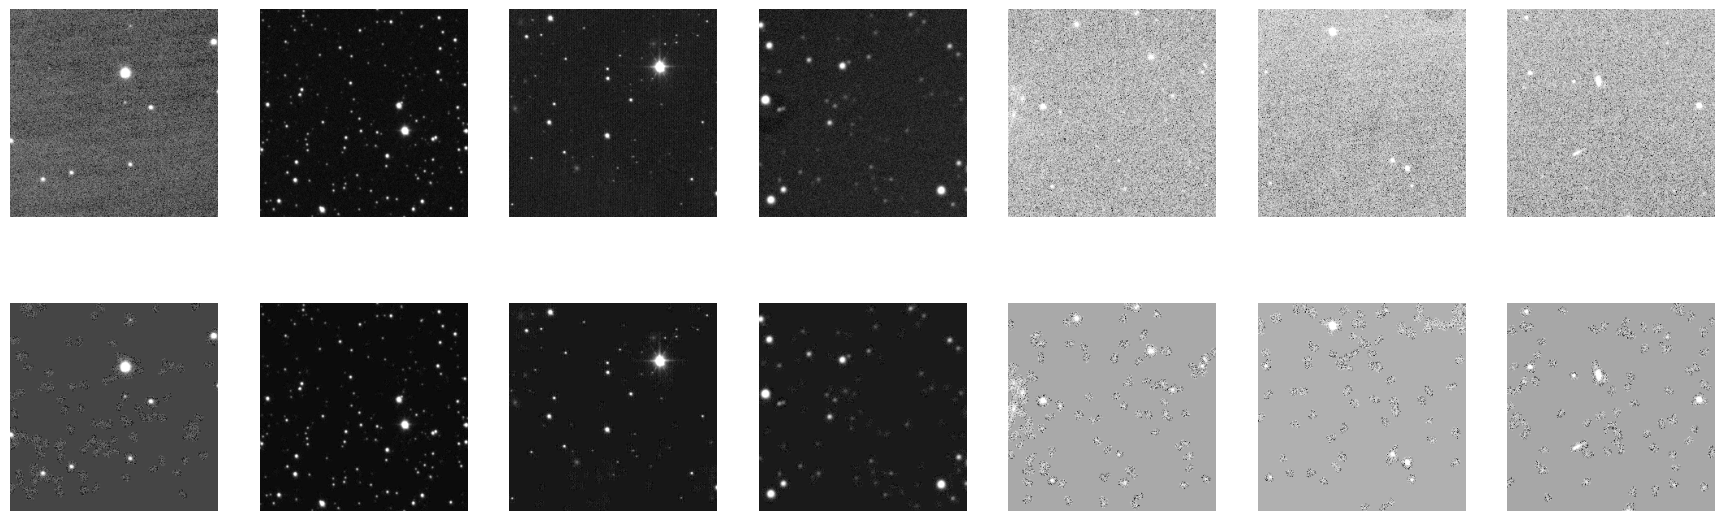

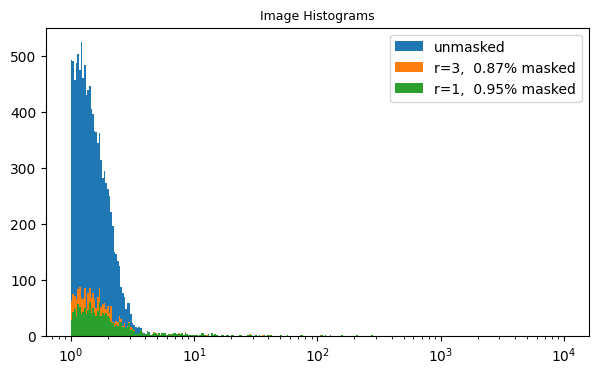

In [ ]:
from astropy.visualization import SqrtStretch, AsinhStretch, ZScaleInterval
from astropy.visualization.mpl_normalize import ImageNormalize
from astropy.io import fits
from astropy.stats import SigmaClip
from photutils.background import Background2D, MedianBackground
from astropy.stats import sigma_clipped_stats, SigmaClip
from photutils.segmentation import detect_threshold, detect_sources
from photutils.utils import circular_footprint

def rescale_astronomical_image(image, bkg_sigma=3.0,
                               window=(50,50),
                               filter_size=(3,3),
                               maxiters=10,
                               npixels=10,
                               radius=3):
    """Rescale an image based on the noise
       See https://photutils.readthedocs.io/en/stable/background.html#sigma-clipping-sources
    """

    # First, estimate the background image
    sigma_clip = SigmaClip(sigma=bkg_sigma)
    bkg_estimator = MedianBackground()
    bkg = Background2D(image, window, filter_size=filter_size,
                   sigma_clip=sigma_clip, bkg_estimator=bkg_estimator)

    # subtract off the background
    new_im = image - bkg.background

    # mask sources and get the stats
    sigma_clip = SigmaClip(sigma=bkg_sigma, maxiters=maxiters)
    threshold = detect_threshold(new_im, nsigma=bkg_sigma-2, sigma_clip=sigma_clip)
    segment_img = detect_sources(new_im, threshold, npixels=npixels)
    footprint = circular_footprint(radius=radius)
    mask = segment_img.make_source_mask(footprint=footprint)
    _, median, std = sigma_clipped_stats(new_im, sigma=bkg_sigma, mask=mask)

    # Rescale
    new_im -= median
    new_im /= std

    return new_im, mask, median, std

# random image
index = random.randint(0, len(file_list)-1)
quad = random.randint(1, 4)

#index = 12
#quad = 1

plt.figure(figsize = (22,7))

for i in range(7):

    # random image
    index = random.randint(0, len(file_list)-1)
    quad = random.randint(1, 4)

    #index = 12
    #quad = 1

    file_path = '/content/drive/MyDrive/ZTF_images/' + file_list[index]
    image = get_image(file_path, quad)

    # get stamps
    stamps = get_stamps(image)
    idx = random.randint(0, len(stamps)-1)
    #idx = 339

    my_stamp = stamps[idx]

    visual_stamp = visual_transform_image(my_stamp)
    #plt.figure(figsize = (7,7))
    #plt.title('original stamp')
    #plt.imshow(visual_stamp.reshape(stamps.shape[1], stamps.shape[2]), cmap = 'gray')
    #plt.colorbar()
    ax = plt.subplot(2, 7, i + 1)
    plt.imshow(visual_stamp.reshape(stamps.shape[1], stamps.shape[2]), cmap = 'gray')

    plt.axis('off')

    # rescale and mask
    im, mask, median, std  = rescale_astronomical_image(stamps[idx].reshape(stamps.shape[1], stamps.shape[2]))
    visual_im = visual_transform_image(im)

    im_masked = im*mask
    visual_im_masked = visual_transform_image(im_masked)

    #plt.figure(figsize = (7,7))
    #plt.title('scaled stamp and masked')
    #plt.imshow(visual_im_masked.reshape(stamps.shape[1], stamps.shape[2]), cmap = 'gray')
    #plt.colorbar()

    ax = plt.subplot(2,7, i+8)
    plt.imshow(visual_im_masked.reshape(stamps.shape[1], stamps.shape[2]), cmap = 'gray')
    plt.axis('off')


bins = 10**(np.linspace(0,4,300))
fig = plt.figure(figsize=(7,4))
im_flat = im.flatten()
plt.hist(im_flat, bins = bins, label = 'unmasked')
plt.title('Image Histograms', fontsize=9)
plt.xscale('log')

im, mask, median, std  = rescale_astronomical_image(stamps[idx].reshape(stamps.shape[1], stamps.shape[2]), radius = 3)
im_masked = im*mask

#fig = plt.figure(figsize=(13,4))
im_masked_flat = im_masked.flatten()
num_masked = list(im_masked_flat).count(np.median(im_masked_flat))
perc=num_masked/len(im_masked_flat)

plt.hist(im_masked_flat, bins = bins, label = f'r=3,  {perc:.2f}% masked')
#plt.title('Image masked Histogram, r = 3', fontsize=9)
plt.xscale('log')

num_masked = list(im_masked_flat).count(np.median(im_masked_flat))
#print(num_masked/len(im_masked_flat))

im, mask, median, std  = rescale_astronomical_image(stamps[idx].reshape(stamps.shape[1], stamps.shape[2]), radius = 1)
im_masked = im*mask

#fig = plt.figure(figsize=(13,4))
im_masked_flat = im_masked.flatten()
num_masked = list(im_masked_flat).count(np.median(im_masked_flat))
perc=num_masked/len(im_masked_flat)
plt.hist(im_masked_flat, bins = bins, label = f'r=1,  {perc:.2f}% masked')
#plt.title('Image masked Histogram, r = 1', fontsize=9)
plt.xscale('log')

plt.legend()




"""print('unmasked min:', np.min(im_flat))
print('unmasked median:', np.median(im_flat))
print('unmasked max:', np.max(im_flat))

print('masked min:', np.min(im_masked_flat))
print('masked median:', np.median(im_masked_flat))
print('masked max:', np.max(im_masked_flat))"""

''

In [ ]:
# making RAW stamps

count = 0
for i in range(1000):
  start = ttime.time()
  # get random indexes from zquery.metatable
  index_list = np.random.randint(0, len(zquery.metatable), size = 20)

  # DOWNLOAD DATA INTO LOCAL DIRECTORY
  urls, locations = zquery.download_data(suffix="test.fits", source="local", download_dir=None,
                                          show_progress=True, nodl=True, indexes=index_list, overwrite = True)
  zquery.download_data("test.fits", nprocess=20, show_progress=True, indexes=index_list)
  end = ttime.time()
  print(end-start)
  # FOR EACH URL/IMAGE make one normalized stamp
  start = ttime.time()
  for url in urls:
    file_path = url
    file_name = url[28:]
    quad = 1

    # get image
    image_data = get_image(file_path, quad)

    # GET STAMPS of image and get random stamp
    stamps = get_stamps(image_data)
    stamp_idx = np.random.randint(0,len(stamps)-1)
    try:
      image = np.array(stamps[stamp_idx]).astype(np.float16)
      im, mask, median, std  = rescale_astronomical_image(image.reshape(stamps.shape[1], stamps.shape[2]), radius = 2)
    except ValueError as e:
      print(f"Error: {e}")
      print('continuing...')
      continue

    # SAVE SINGLE STAMP AND MASK
    np.save('/content/drive/MyDrive/ZTFrawstampsmask/' + file_name[:-8] + '_mask', mask)
    np.save('/content/drive/MyDrive/ZTFrawstamps/' + file_name[:-8],image)

  end = ttime.time()
  print(end-start)
  shutil.rmtree('./Data')

  count += 1
  print(count)



19.064929008483887
8.569552421569824
1
15.937359094619751
8.643577814102173
2
17.000305891036987
8.332924365997314
3
12.143844604492188
8.179741859436035
4
12.5223548412323
8.394339323043823
5
12.645382165908813
9.044690132141113
6
11.91079044342041
7.85110068321228
7
10.054430484771729
8.665385723114014
8
8.38813829421997
8.68941593170166
9
7.435863494873047
Error: All boxes contain > 250.0 (10.0 percent per box) masked pixels (or all are completely masked). Please check your data or increase "exclude_percentile" to allow more boxes to be included.
continuing...
8.521381139755249
10
10.218887567520142
8.252280950546265
11
9.521457195281982
8.670244455337524
12
6.382950782775879
7.8974127769470215
13
9.948957443237305
7.8391900062561035
14
9.473679304122925
8.652165174484253
15
8.272238731384277
7.87739896774292
16
10.281544208526611
7.8889851570129395
17
13.900474309921265
8.215314865112305
18
7.241183280944824
8.26175856590271
19
8.42211627960205
8.929334163665771
20
7.97807264328002

KeyboardInterrupt: ignored

In [ ]:
# check ZTFquerystamps list
"""folder_path_1 = '/content/drive/MyDrive/ZTFquerystamps'
file_list_1 = os.listdir(folder_path_1)
#print(file_list_1)
print(len(file_list_1))

folder_path_2 = '/content/drive/MyDrive/ZTFquerystamps2'
file_list_2 = os.listdir(folder_path_2)
#print(file_list_2)
print(len(file_list_2))"""

"""folder_path_3 = '/content/drive/MyDrive/ZTFquerystamps3'
file_list_3 = os.listdir(folder_path_3)
#print(file_list_2)
print(len(file_list_3))"""


folder_path_test = '/content/drive/MyDrive/ZTFrawstamps'
file_list_test = os.listdir(folder_path_test)
print(len(file_list_test))

folder_path_test = '/content/drive/MyDrive/ZTFrawstampsmask'
file_list_test = os.listdir(folder_path_test)
print(len(file_list_test))

59393
59393


In [ ]:
import time

def generate_train_stamps_ZTFquery(batch_size):
  while True:
    counter = 0
    stamp_list = []
    for i in range(len(file_list_3)):
      if (counter == batch_size):
        counter = 0
        yield np.array(stamp_list)
        stamp_list = []

      file_path = folder_path_3 + '/' + file_list_3[3]
      image_data = np.load(file_path)
      stamp_list.append(image_data)
      counter += 1

gen = generate_train_stamps_ZTFquery(64)

start = time.time()
for i in range(10):
  stamps = next(gen)
end = time.time()
print(end-start)

print(np.shape(stamps))
#plt.imshow(stamps[0].reshape(256,256),cmap = 'gray')

0.7228753566741943
(64, 256, 256, 1)


In [ ]:
import shutil

#shutil.rmtree('./Data')
shutil.rmtree('/content/drive/MyDrive/ZTFrawstampstest')

In [ ]:
folder_path = '/content/drive/MyDrive/ZTFrawstamps'
file_list = os.listdir(folder_path)
print(len(file_list))

folder_path_mask = '/content/drive/MyDrive/ZTFrawstampsmask'
file_list_mask = os.listdir(folder_path_mask)
print(len(file_list_mask))

2454
2454


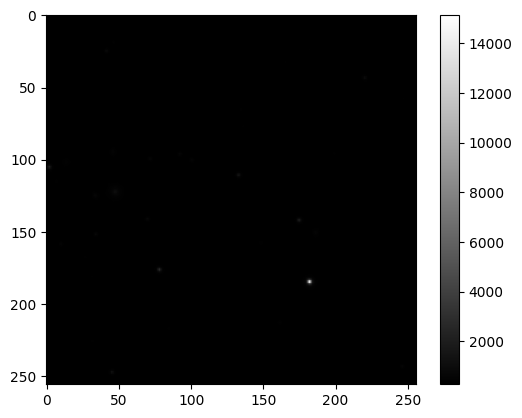

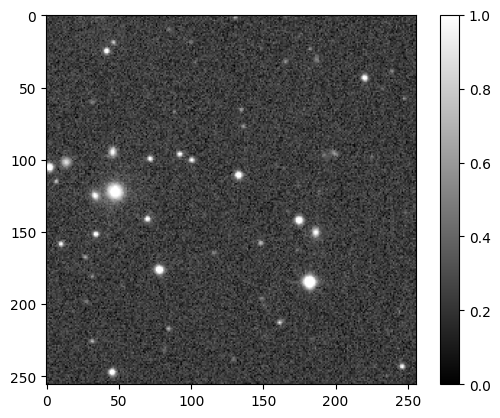

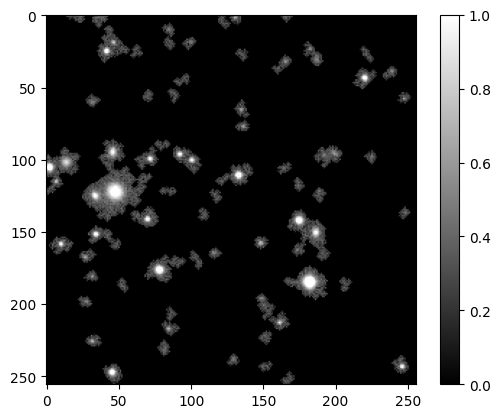

In [ ]:
# check out some stamps in ZTFrawstamps

idx = np.random.randint(0, len(file_list)-1)
file_path = folder_path + '/' + file_list[idx]
file_path_mask = folder_path_mask + '/' + file_list_mask[idx]
image_data = np.load(file_path)
mask = np.load(file_path_mask)

image_data_mask = image_data*mask.reshape(256,256,1)

plt.imshow(image_data.reshape(256,256), cmap = 'gray')
plt.colorbar()

plt.figure()
plt.imshow(visual_transform_image(image_data).reshape(256,256), cmap = 'gray')
plt.colorbar()

image_data_mask = visual_transform_image(image_data)*mask.reshape(256,256,1)

plt.figure()
plt.imshow(image_data_mask.reshape(256,256), cmap = 'gray')
plt.colorbar()
